**Sustainable Software Development, block course, March 2021**  
*Scientific Software Center, Institute for Scientific Computing, Dr. Inga Ulusoy*

# Analysis of the data

Imagine you perform a "measurement" of some type and obtain "scientific data". You know what your data represents, but you have only a vague idea how different features in the data are connected, and what information you can extract from the data.

You would start first with going through the data, making sure your data set is complete and that the result is reasonable. Imagine this already happened.

In the next step, you would inspect your data more closely and try to identify structures. That is the step that we are focusing on in this unit.

In the `data` folder, you will find several data files (`*.t` and `*.dat`). These are data files generated through some "new approach" that hasn't been used in your lab before. No previous analysis software exists, and you are going to establish a protocol for this "new approach" and "publish your results".

The data can be grouped into two categories: 
1. data to be analyzed using statistical methods;
2. data to be analyzed using numerical methods.

In your hypothetical lab, you are an "expert" in one particular "method", and your co-worker is an "expert" in the other. Combined these two methods will lead to much more impactful results than if only one of you analyzed the data. Now, the task in this course is to be solved collaboratively with your team member working on one of the analysis approaches, and you working on the other. You will both implement functionality into the same piece of "software", but do so collaboratively through git.

As you do not know yet which analysis is most meaningful for your data, and how to implement it, you will start with a jupyter notebook. You and your team member will work on the same notebook that will be part of a github repository for your project. This is the task for today. Discuss with your team members who will work on the statistical and who on the numerical analysis.

## Step 1

Generate a github repository with the relevant files.

## Step 2

Clone the repository to your local machine.

## Step 3

Start working on task 1 for your analysis approach. 

## Step 4

Create your own branch of the repository and commit your changes to your branch; push to the remote repository.

## Step 5

Open a `pull request` so your team member can review your implementation. Likewise, your team member will ask you to review theirs.

## Step 6

Merge the changes in your branch into `main`. Resolve conflicts.

## Step 7

Repeat working on task; committing and pushing to your previously generated branch or a new branch; open a pull request; merge with main; until you have finished all the tasks in your analysis approach. Delete obsolete branches.

# Start of the analysis notebook

**Author : Your Name**  
*Date : The date you started working on this*  
*Affiliation : The entity under whose name you are working on this*  

Place the required modules in the top, followed by required constants and global functions.

In [ ]:
# required modules

In [ ]:
# constants and global functions

In [ ]:
# reading of the data files

# Statistical analysis

Find correlations in the data sets. Analyse the data statistically and plot your results.  

Here we would want to do everything with pandas and leave the data in a dataframe. The files that are relevant to you are `expect.t`, `npop.t` and `table.dat`.

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.linalg import lapack
import pandas as pd
import seaborn as sns

### Task 1: Read in expec.t and plot relevant data

In [2]:
# read and plot expec.t

dir = '/tmpa/jacqueline/team3/data' 
path_expect = os.path.join(dir, 'expec.t')
df_expect = pd.read_table(path_expect,header=None,delim_whitespace=True,skiprows=1,names=['time','norm','<x>','<y>','<z>','<H>'])

print(df_expect)

FileNotFoundError: [Errno 2] No such file or directory: '/tmpa/jacqueline/team3/data/expec.t'

We can discard the entries norm, \<x>, and \<y> as these are mostly constant.

In [ ]:
# eliminate columns based on the variance: if the variance of the values
# in a column is below a given threshold, that column is discarded

df_expect = df_expect.drop(columns=['<x>','<y>'])
print(df_expect)

### Task 2: Create plots of the relevant data and save as .pdf.

In [ ]:
# create plots

time_string = df_expect[["time"]].to_numpy() #array of strings
time = time_string.astype(float) #array of floats

z_string = df_expect[["<z>"]].to_numpy() #array of strings
z = z_string.astype(float) #array of floats

H_string = df_expect[["time"]].to_numpy() #array of strings
H = H_string.astype(float) #array of floats


plt.plot(time,z)
plt.ylabel('<z>')
plt.xlabel('time')
plt.savefig('expect_z.pdf')
plt.show()

plt.plot(time,H)
plt.ylabel('<H>')
plt.xlabel('time')
plt.savefig('expect_H.pdf')
plt.show()

### Task 3: Read in file `npop.t` and analyze correlations in the data

In [ ]:
# read in npop.t

dir = '/tmpa/jacqueline/team3/data' 
path_npop = os.path.join(dir, 'npop.t')
df_npop = pd.read_table(path_npop,header=None,delim_whitespace=True,skiprows=2,names=['time','MO1','MO2','MO3',
                                                                                      'MO4','MO5','MO6','MO7',
                                                                                      'MO8','MO9','MO10','MO11',
                                                                                      'MO12','MO13','MO14','MO15',
                                                                                      'MO16','MO17','MO18','MO19',
                                                                                      'MO20','MO21','MO22','MO23', 
                                                                                      'MO24','MO25','MO26','MO27',
                                                                                      'MO28','MO29','MO30','MO31',
                                                                                      'MO32','MO33','MO34','MO35',
                                                                                      'MO36','MO37','MO38'])

print(df_npop)

In [ ]:
# discard all columns with variance below a set threshold - we can consider them as constant
threshold = 0.005
index = np.linspace(1,38,38)
tsteps = len(df_npop['time'])


for i in range(len(index)):
    npop_string = df_npop[['MO'+str(int(index[i]))]].to_numpy() #array of strings
    npop = npop_string.astype(float) #array of floats
    for t in range(tsteps):
        if npop[t] < threshold:
            df_npop = df_npop.drop(columns='MO'+str(int(index[i])))
            break
        else:
            continue

print(df_npop)      

Plot the remaining columns. Seaborn prefers "long format" (one column for all measurement values, one column to indicate the type) as input, whereas the cvs is in "wide format" (one column per measurement type).

In [ ]:
# plot ideally with seaborn

#df_npop_plot = df_npop.melt('time', var_name='columns',  value_name='MO')
#plots = sns.catplot(x='time', y='MO', hue='columns', data=df_npop_plot)
plot = sns.pairplot(df_npop,x_vars='time',height = 5)

## Quantify the pairwise correlation in the data

- negative correlation: y values decrease for increasing x - large values of one feature correspond to small values of the other feature
- weak or no correlation: no trend observable, association between two features is hardly observable
- positive correlation: y values increase for decreasing x - small values of one feature correspond to small values of the other feature

Remember that correlation does not indicate causation - the reason that two features are associated can lie in their dependence on same factors.

Correlate the value pairs using Pearson's $r$. Pearson's $r$ is a measure of the linear relationship between features:

$r = \frac{\sum_i(x_i − \bar{x})(y_i − \bar{y})}{\sqrt{\sum_i(x_i − \bar{x})^2 \sum_i(y_i − \bar{y})^2}}$

Here, $\bar{x}$ and $\bar{y}$ indicate mean values. $i$ runs over the whole data set. For a positive correlation, $r$ is positive, and negative for a negative correlation, with minimum and maximum values of -1 and 1, indicating a perfectly linear relationship. Weakly or not correlated features are characterized by $r$-values close to 0.

Other measures of correlation that can be used are Spearman's rank (value pairs follow monotonic function) or Kendall's $\tau$ (measures ordinal association), but they do not apply here. You can also define measures yourself.

In [ ]:
# print the correlation matrix
print(df_npop.corr())

The diagonal values tell us that each value is perfectly correlated with itself. We are not interested in the diagonal values and also not in the correlation with time. We also need to get rid of redundant entries. Finally, we need to find the value pairs that exhibit the highest linear correlation. We still want to know if it is positive or negative correlation, so we cannot get rid of the sign.

In [ ]:
# get rid of time column, lower triangular and diagonal entries of the correlation matrix
df_npop = df_npop.drop(columns=['time'])
df_npop_corr = df_npop.corr()

df_npop_corr_np = np.triu(df_npop_corr,k=1)
df_npop_corr = pd.DataFrame(data = df_npop_corr_np)
print(df_npop_corr)

# sort the remaing values according to their absolute value, but keep the sign
abs_val = df_npop_corr.abs().unstack() #creates series of absolute values
abs_val = abs_val.reset_index(drop=True) #sets default index
abs_val = abs_val.sort_values(ascending = False) #sorts by absolute values
index_val = abs_val.index.values  #array of indexes after sorting by absolute value

df_npop_corr = df_npop_corr.unstack() #creates series of correlation matrix
df_npop_corr = df_npop_corr.iloc[index_val] #sort values by index of abs_val
df_npop_corr = df_npop_corr.reset_index(drop=True) #new default index

numb_val = df_npop_corr.to_numpy().nonzero() #position of nonzero entries
df_npop_corr = df_npop_corr.iloc[numb_val]  #only values belonging to the position of nonzero values
print(df_npop_corr)



Note that the entries in the left column are not repeated if they do not change from the row above (so the fourth feature pair is MO3 and MO6).

### Task 4: Print the resulting data to a file

In [ ]:
# write to file
np.savetxt('corr.txt',df_npop_corr)

### Task 5: Calculate the Euclidean distance (L2 norm) for the vectors in `table.dat`


The Euclidean distance measures the distance between to objects that are not points:

$d(p,q) = \sqrt{\left(p-q\right)^2}$

In this case, consider each of the columns in table.dat as a vector in Euclidean space, where column $r(x)$ and column $v(x)$ denote a pair of vectors that should be compared, as well as $r(y)$ and $v(y)$, and r(z) and v(z).

(Background: These are dipole moment components in different gauges, the length and velocity gauge.)

In [ ]:
# read in table.dat - I suggest reading it as a numpy array
# replace the NaNs by zero

Now calculate how different the vectors in column 2 are from column 3, column 4 from column 5, and column 6 from column 7.

In [ ]:
# calculate the Euclidean distance

In [ ]:
# plot the result and save to a .pdf

In [ ]:
# print the result to a file

# Numerical analysis

Analyze the data using autocorrelation functions and discrete Fourier transforms. Plot your results.

In [3]:
# define some global functions
import array
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftshift

from numpy import *

### Task 1: Read in `efield.t` and Fourier-transform relevant columns

In [4]:
# read and plot efield.t
dt=0.1
t_fin=10
t_grid=int(t_fin/dt+1)

dat_ef = zeros([3,t_grid])

dir = '/home/gomezj/PhD/2021_Art_SSD/team3/data/efield.t' 
ptemp=pd.read_csv(dir,'\s+',header=None,skiprows=1)

for i in (0,1,2):
    dat_ef[i]=ptemp[i+1].values

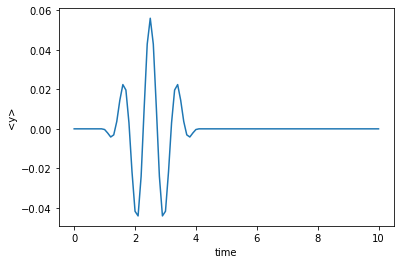

In [5]:
t1=arange(0,t_fin+dt,dt)

plt.plot(t1,dat_ef[1])
plt.ylabel('<y>')
plt.xlabel('time')
plt.show()

Here we are interested in column 2 since the others are constant.

In [6]:
# discard the columns with variance below threshold - these are considered constant
thr1=0.0001

useless=(dat_ef < thr1).all(axis=1)

for i in range(len(useless)):
    if useless[i]==True:
        dat_ef=np.delete(dat_ef,i)

In [7]:
# discrete Fourier transform of the remaining column: You only need the real frequencies
FT_in=fft.fft(dat_ef)
FT_fq=fft.fftfreq(len(dat_ef))

### Task 2: Generate a plot of your results to be saved as pdf.

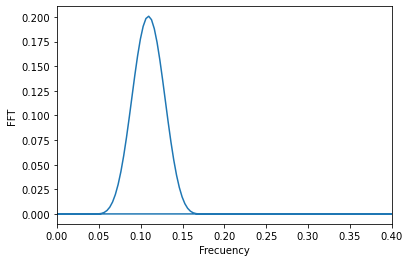

In [8]:
# plot your results
plt.plot(FT_fq,abs(FT_in)**2)
plt.xlim(0.0,0.4)
plt.ylabel('FFT')
plt.xlabel('Frecuency')
plt.show()

#plt.savefig('FFT_ef.pdf', dpi=600,bbox_inches='tight')    

### Task 3: Calculate the autocorrelation function from nstate_i.t
The autocorrelation function measures how correlated subsequent vectors are with an initial vector; ie. 

$\Psi_{corr} = \langle \Psi(t=0) | \Psi(t) \rangle = \int_0^{tfin} \Psi(0)^* \Psi(t) dt$

Since we are in a numerical representation, the integral can be replaced with a sum; and the given vectors are already normalized.

In [9]:
# read in as numpy array
dir1 = '/home/gomezj/PhD/2021_Art_SSD/team3/data/nstate_i.t' 

dat_nst=np.loadtxt(dir1,skiprows=1)
dat_nst=dat_nst.T

In [10]:
# store the time column (column 0) in a vector and drop from array
time_vc=zeros([len(dat_nst[0])])
time_vc=dat_nst[:,0]    

dat_nst=np.delete(dat_nst,[0],axis=0)

In [11]:
# correct the data representation: this is in fact a complex matrix
# the real part of each matrix column is contained in numpy array column 0, 2, 4, 6, ...
# the imaginary part of each matrix column is contained in numpy array column 1, 3, 5, 7, ...
# convert the array that was read as dtype=float into a dtype=complex array

t2_wf=len(dat_nst[:,0])
t_wf=int(t2_wf/2)
p_wf=len(dat_nst[0])

comp_vc=zeros([t_wf,p_wf],dtype=np.complex_)

for t in range(t_wf):
    comp_vc[t]=dat_nst[t*2] + dat_nst[1+t*2]*1j    

In [27]:
print(p_wf)

101


In [12]:
# for the autocorrelation function, we want the overlap between the first vector at time 0 and all 
# subsequent vectors at later times - the sum of the product of initial and subsequent vectors for each time step

ac_fc1=zeros([p_wf,t_wf+1],dtype=np.complex_)

for n in range(p_wf):
    ac_fc1[n]=np.sum(comp_vc[:,0]*np.conjugate(comp_vc[:,n]))

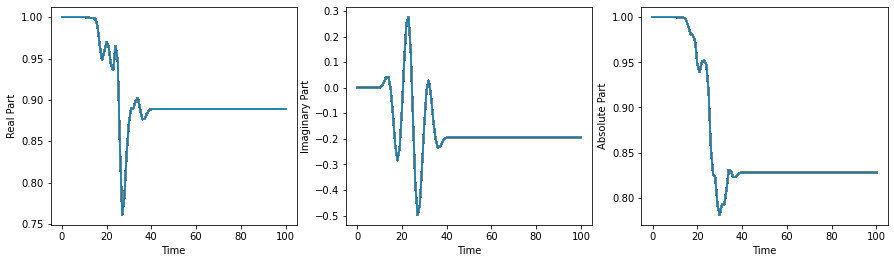

In [13]:
# plot the autocorrelation function - real, imaginary and absolute part

fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(np.real(ac_fc1))
ax[1].plot(np.imag(ac_fc1))
ax[2].plot(abs(ac_fc1**2))

ax[0].set_ylabel('Real Part')
ax[1].set_ylabel('Imaginary Part')
ax[2].set_ylabel('Absolute Part')

for i in range(3):
    ax[i].set_xlabel('Time')
plt.show()

In [21]:
# correct the data representation: this is in fact a complex matrix
# the real part of each matrix column is contained in numpy array column 0, 2, 4, 6, ...
# the imaginary part of each matrix column is contained in numpy array column 1, 3, 5, 7, ...
# convert the array that was read as dtype=float into a dtype=complex array

t2_wf=len(dat_nst[:,0])
t_wf=int(t2_wf/2)
p_wf=len(dat_nst[0])

comp_vc1=zeros([t_wf,p_wf],dtype=np.complex_)

for t in range(t_wf):
    comp_vc1[t]=dat_nst[t*2] + dat_nst[1+t*2]*1j    

In [26]:
print(comp_vc1[4])

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  1.40297929e-05+1.56286002e-04j  4.03391972e-04+1.81292036e-03j
  2.45516594e-03+5.89149103e-03j  6.86781020e-03+8.95193133e-03j
  1.08137265e-02+3.88035488e-03j  9.95591448e-03-1.54345595e-02j
  3.06769830e-03-4.96389190e-02j -1.31798287e-02-8.58160971e-02j
 -4.98591205e-02-9.21263980e-02j -9.03881476e-02-3.34072438e-02j
 -7.25133842e-02+6.53136139e-02j  5.70096337e-03+1.27703817e-01j
  9.93897483e-02+1.27114329e-01j  1.56118112e-01+6.08140304e-02j
  1.56937046e-01-4.43576877e-02j  1.49244086e-01-1.69116780e-01j
  1.43926635e-01-2.82487088e-01j  5.49560234e-02-3.59220727e-01j
 -1.54764303e-01-3.15456032e-01j -3.09496083e-01-8.85507964e-02j
 -2.76458046e-01+1.749505

In [18]:
# for the autocorrelation function, we want the overlap between the first vector at time 0 and all 
# subsequent vectors at later times - the sum of the product of initial and subsequent vectors for each time step

ac_fc3=zeros([p_wf],dtype=np.complex_)

for n in range(p_wf):
    ac_fc3[n]=np.correlate(comp_vc[:,0],comp_vc[:,n])

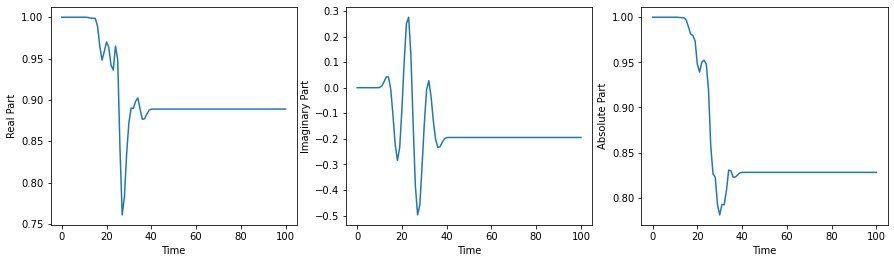

In [19]:
# plot the autocorrelation function - real, imaginary and absolute part

fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(np.real(ac_fc3))
ax[1].plot(np.imag(ac_fc3))
ax[2].plot(abs(ac_fc3**2))

ax[0].set_ylabel('Real Part')
ax[1].set_ylabel('Imaginary Part')
ax[2].set_ylabel('Absolute Part')

for i in range(3):
    ax[i].set_xlabel('Time')
plt.show()

### Task 4: Generate a plot of your results to be saved as pdf.

### Task 5: Discrete Fourier transform of the autocorrelation function

In [14]:
# discrete Fourier-transform the autocorrelation function - now we need all frequency components, 
# also the negative ones

### Task 6: Generate a plot of your results to be saved as pdf.

In [15]:
# plot the power spectrum (abs**2)